# Evaluation

In [1]:
import os
import sys
%matplotlib inline
sys.path.insert(1, os.path.dirname(os.path.abspath('')) + '/../../')
from IPython.display import display, Markdown

[111021142157|0/0MiB] [Warning] running in notebook
[111021142200|0/0MiB] read /BS/dstutz/work/data/Cifar10/train_images.h5
[111021142200|0/0MiB] read /BS/dstutz/work/data/Cifar10/train_labels.h5
[111021142201|0/0MiB] read /BS/dstutz/work/data/Cifar10/test_images.h5
[111021142201|0/0MiB] read /BS/dstutz/work/data/Cifar10/test_labels.h5
[111021142201|0/0MiB] read /BS/dstutz/work/data/Cifar10/test_images.h5
[111021142201|0/0MiB] read /BS/dstutz/work/data/Cifar10/test_labels.h5
[111021142202|0/0MiB] read /BS/dstutz/work/data/Cifar10/test_images.h5
[111021142202|0/0MiB] read /BS/dstutz/work/data/Cifar10/test_labels.h5
[111021142202|0/0MiB] read /BS/dstutz/work/data/Cifar10/test_images.h5
[111021142202|0/0MiB] read /BS/dstutz/work/data/Cifar10/test_labels.h5
[111021142202|0/0MiB] loading data augmentation
[111021142203|0/0MiB] set up attacks ...
[111021142204|0/0MiB] set up models ...


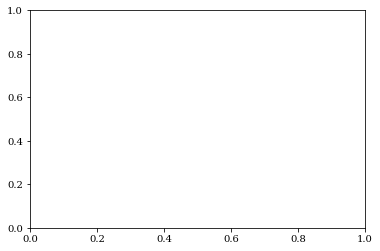

In [2]:
import common.experiments.eval as ev
import experiments.mlsys.cifar10 as config

x = 0: weight_bit_random_benchmark_g000005
x = 1: weight_bit_random_benchmark_g00001
x = 2: weight_bit_random_benchmark_g000025
x = 3: weight_bit_random_benchmark_g00005
x = 4: weight_bit_random_benchmark_g000075
x = 5: weight_bit_random_benchmark_g0001
x = 6: weight_bit_random_benchmark_g00025
x = 7: weight_bit_random_benchmark_g0005
x = 8: weight_bit_random_benchmark_g00075
x = 9: weight_bit_random_benchmark_g001
x = 10: weight_bit_random_benchmark_g0015
x = 11: weight_bit_random_benchmark_g002
x = 12: weight_bit_random_benchmark_g0025


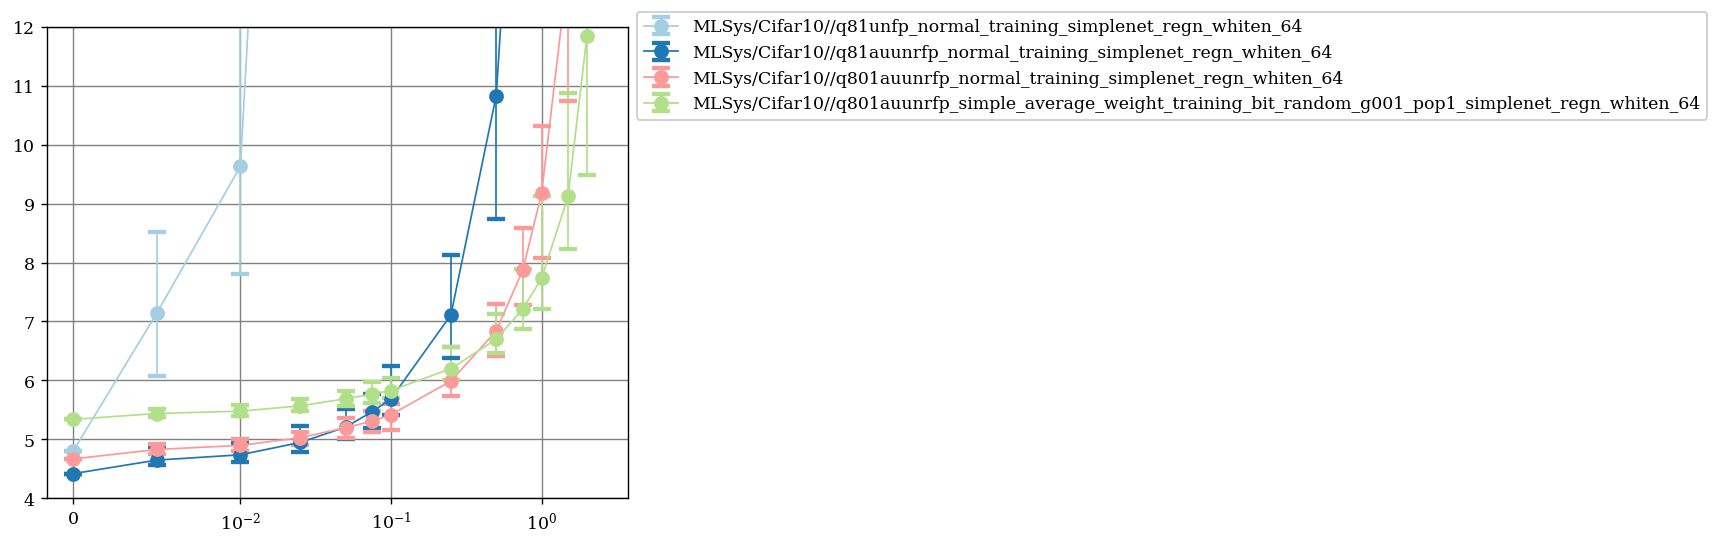

In [3]:
training_configs, attack_configs = ev.load(config,
        training_config_vars=[
            'q81unfp_normal_training',
            'q81auunrfp_normal_training',
            'q801auunrfp_normal_training',
            'q801auunrfp_simple_average_weight_training_bit_random_g001_pop1',
        ],
        training_suffixes='_simplenet_regn_whiten_64',
        attack_config_vars=[
            'weight_bit_random_benchmark_g000005',
            'weight_bit_random_benchmark_g00001',
            'weight_bit_random_benchmark_g000025',
            'weight_bit_random_benchmark_g00005',
            'weight_bit_random_benchmark_g000075',
            'weight_bit_random_benchmark_g0001',
            'weight_bit_random_benchmark_g00025',
            'weight_bit_random_benchmark_g0005',
            'weight_bit_random_benchmark_g00075',
            'weight_bit_random_benchmark_g001',
            'weight_bit_random_benchmark_g0015',
            'weight_bit_random_benchmark_g002',
            'weight_bit_random_benchmark_g0025',
        ],
)
attack_evaluations, attack_evaluation_epochs = ev.get_attack_evaluations(config, training_configs, attack_configs, limit=9000)
training_labels = [
    'Normal',
    'RQuant',
    'Clipping',
    'RandBET',
]
ev.plot_attack_evaluations_line(training_configs, attack_configs, attack_evaluations,
                                metric_at_zero='reference_test_error',
                                latex_labels=training_labels,
                               attack_labels=[0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.5],
                                h=5, w=6, ymax=12, ymin=4, xscale='symlog', linthreshx=0.01)